Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_ost_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_wt_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_wt_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 3)
(6459, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,194.538295,2.248903,0.566691,1823.877023,0.000000e+00,0.000000e+00
SPAC19D5.01,785.112441,0.512240,0.241933,1378.228045,7.183368e-296,2.319510e-292
SPBC365.12c,2777.157909,1.426321,0.172215,1311.252966,2.330119e-281,5.015969e-278
SPCPB16A4.07,2330.086616,1.293065,0.278453,1092.090662,6.901209e-234,1.114200e-230
SPBC21C3.19,3351.602947,2.746294,0.224419,990.070391,8.483585e-212,1.095740e-208
...,...,...,...,...,...,...
SPAC343.18,187.167361,-0.040546,0.208468,0.270930,9.981543e-01,9.986182e-01
SPCC777.15,76.219994,-0.006933,0.402207,0.229976,9.987569e-01,9.989116e-01
SPBC28F2.05c,153.393201,-0.101474,0.370839,0.230511,9.987499e-01,9.989116e-01
SPAC17G6.04c,679.685688,0.018728,0.141801,0.179090,9.993226e-01,9.993226e-01


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029832,-1502.348650,1423.318819
SPBC1105.13c,-97.521708,-788.908226,691.386518
SPAC19D5.01,-114.097864,-725.921460,611.823596
SPNCRNA.1165,-82.640613,-587.364886,504.724273
SPBC725.03,-109.633055,-571.780826,462.147771
...,...,...,...
SPAC17D4.04,-147.710011,-133.487361,-14.222650
SPAC1834.03c,-176.233318,-161.986731,-14.246586
SPAC23D3.11,-141.074255,-125.854224,-15.220032
SPBC776.09,-146.992068,-130.542108,-16.449960


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G
#_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPAC212.11,-24.572469,-8.479976,-16.092492
SPAC212.09c,-15.460841,11.972168,-27.433009
SPAC212.04c,-22.634089,5.843851,-28.477940
SPAC212.01c,-14.571765,-7.604327,-6.967438
SPNCRNA.601,-23.099102,-7.995763,-15.103339
...,...,...,...
SPMITTRNATYR.01,31.367641,51.127349,-19.759708
SPMITTRNAILE.02,-9.033100,26.318865,-35.351965
SPMIT.10,-0.231256,40.852586,-41.083842
SPMITTRNAGLU.01,-12.439937,28.319146,-40.759083


0.1
0.2595649445984556


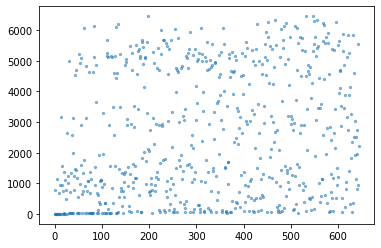

0.4579200484408547


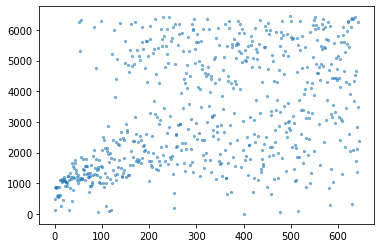

0.2
0.1079340911361013


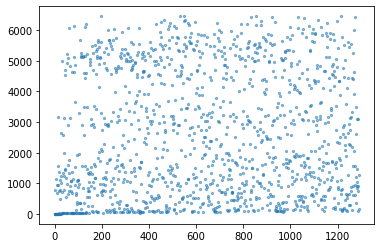

0.31643212570798274


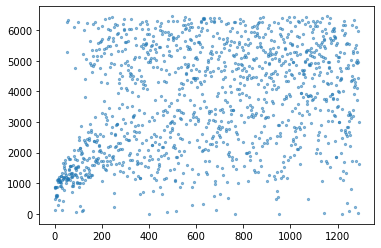

0.30000000000000004
0.1385101493160757


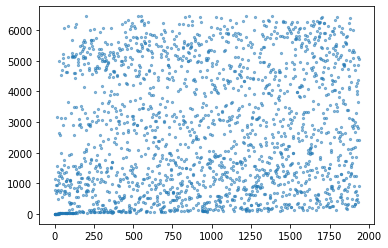

0.2657814413894917


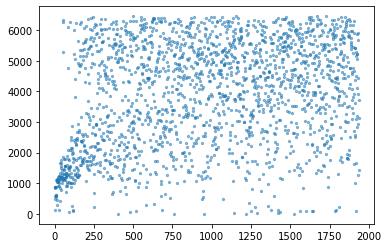

0.4
0.14716227769574633


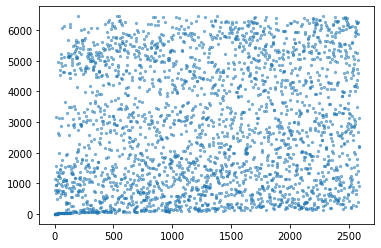

0.19003721302897175


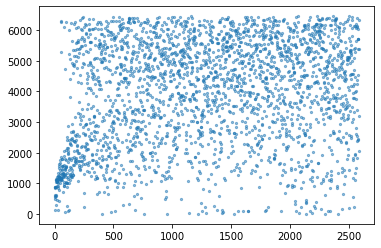

0.5
0.1536005107932662


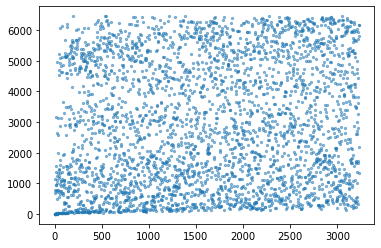

0.08367280672176439


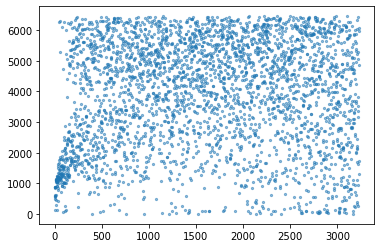

0.6000000000000001
0.1509183659590493


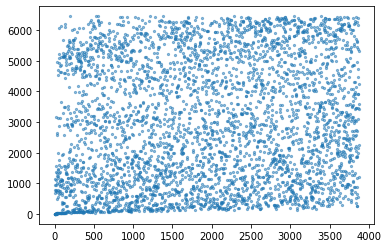

-0.03844135963464326


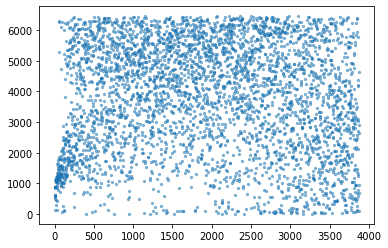

0.7000000000000001
0.15389076285529207


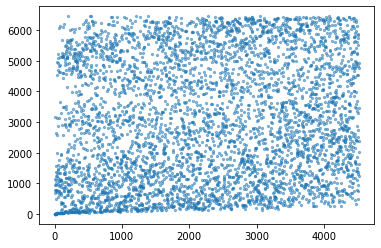

-0.13459611845167055


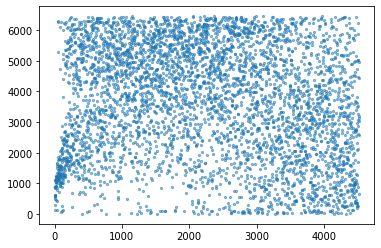

0.8
0.1718231107579726


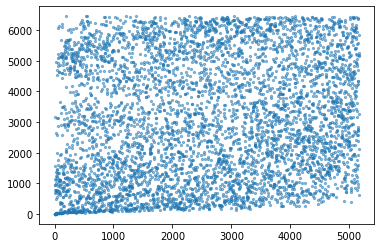

-0.2271884257995894


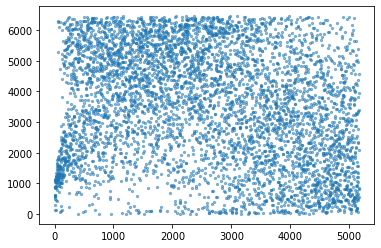

0.9
0.18951820991721052


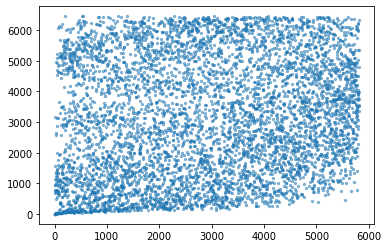

-0.2886913886575272


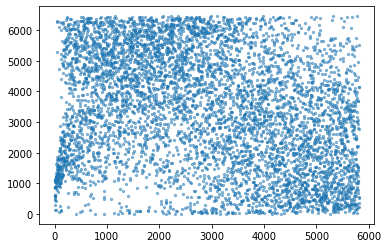

1.0
0.21728445699010576


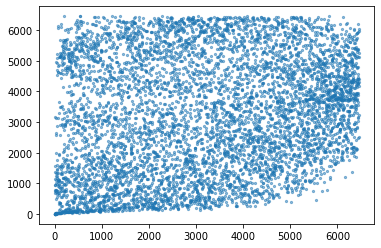

-0.3458379322835005


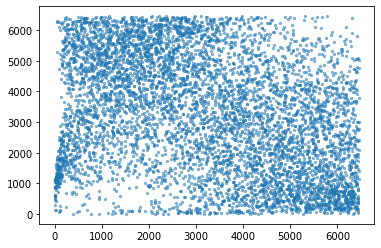

In [6]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

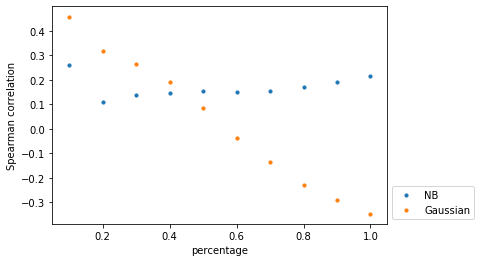

In [7]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [8]:
list(DESeq_sorted.index.values)

['SPBC2F12.09c',
 'SPAC19D5.01',
 'SPBC365.12c',
 'SPCPB16A4.07',
 'SPBC21C3.19',
 'SPCC1322.08',
 'SPCPB16A4.06c',
 'SPBC660.05',
 'SPBC725.03',
 'SPAC2C4.17c',
 'SPBC1105.13c',
 'SPBC839.06',
 'SPBC660.07',
 'SPBC4B4.08',
 'SPNCRNA.1165',
 'SPBC106.10',
 'SPAC6B12.07c',
 'SPAC23C11.06c',
 'SPAC1002.19',
 'SPAC32A11.02c',
 'SPAC22F8.05',
 'SPBC660.06',
 'SPBC11C11.06c',
 'SPAC11E3.14',
 'SPAC26F1.04c',
 'SPBC106.02c',
 'SPCC794.04c',
 'SPCC16A11.15c',
 'SPCC1183.11',
 'SPCC1393.12',
 'SPBC26H8.08c',
 'SPACUNK4.17',
 'SPAC139.05',
 'SPBC16A3.02c',
 'SPAC2F3.05c',
 'SPBC32F12.03c',
 'SPBC215.05',
 'SPBC1289.14',
 'SPAC4H3.03c',
 'SPCP31B10.06',
 'SPCC1223.03c',
 'SPAC328.03',
 'SPAC688.04c',
 'SPAPB24D3.09c',
 'SPCC61.03',
 'SPAP7G5.06',
 'SPCC569.05c',
 'SPAC16A10.01',
 'SPCC191.01',
 'SPAC19A8.16',
 'SPBC1105.14',
 'SPCC338.12',
 'SPAC140.02',
 'SPAC17H9.04c',
 'SPBC20F10.03',
 'SPBC17D1.06',
 'SPCC63.14',
 'SPCC594.04c',
 'SPAC23H3.15c',
 'SPACUNK4.15',
 'SPCC320.03',
 'SPBC713.07c',

In [9]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029832,-1502.348650,1423.318819
SPAC19D5.01,-114.097864,-725.921460,611.823596
SPBC365.12c,-163.035583,-164.570295,1.534712
SPCPB16A4.07,-133.031279,-536.599650,403.568371
SPBC21C3.19,-146.014365,-557.678555,411.664190
...,...,...,...
SPAC343.18,-89.823057,-89.822636,-0.000421
SPCC777.15,-86.479161,-86.473072,-0.006090
SPBC28F2.05c,-98.954886,-98.954658,-0.000227
SPAC17G6.04c,-105.833441,-105.755042,-0.078398


In [10]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-21.897779,-15.166791,-6.730988
SPAC19D5.01,-15.597537,-3.215907,-12.381630
SPBC365.12c,-11.518583,5.580452,-17.099035
SPCPB16A4.07,-20.725368,-4.104633,-16.620735
SPBC21C3.19,-16.442299,0.998865,-17.441164
...,...,...,...
SPAC343.18,3.972107,35.985830,-32.013723
SPCC777.15,-9.273692,19.756911,-29.030602
SPBC28F2.05c,-10.853131,19.505071,-30.358202
SPAC17G6.04c,11.476953,46.902589,-35.425636


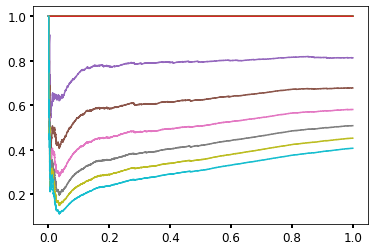

In [15]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()
cmap = plt.cm.hot

dfs = [GPcounts_G_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= .005 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])

        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        plt.tick_params(labelsize='large', width=2) 
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        
    plt.show()
